

## Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected TMDb Dataset to work on this project- Investigate a Dataset.This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.
I have selected some questions and through out the project I have done analysis on them and showcased my visualization and conclusion on them.

Questions covered on this project:

#### 1.Which genres are most popular from year to year?
#### 2.In Which Year the Most of the Movies got released?
#### 3.What are the average popularities of movies according to budget levels?
#### 4.What are profit trends from year to year?
#### 5.What are the average runtimes of movies over the years?
#### 6.Which are the 5 cheapest and most expensive profitable movies of all time?
#### 7.Which variables affect the revenue and popularity of a film?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv(r"D:/Udacity/Investigate a Dataset/tmdb-movies.csv")
#printing first five rows with defined columns of tmdb-movies database
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking the shape of the dataset i.e. the number of rows and columns
df.shape

(10866, 21)

In [4]:
# Inspecting the data types and looking for instances of missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Checking no of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
#Checking Datatypes of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Checking how many rows and columns are there where budget and revenue values are Zeroes indvidually:

In [7]:
rows, col = df.query('budget == 0').shape
print('There are {} rows and {} columns'.format(rows, col))

There are 5696 rows and 21 columns


In [8]:
rows, col = df.query('revenue == 0').shape
print('There are {} rows and {} columns'.format(rows, col))

There are 6016 rows and 21 columns




### Data Cleaning

Firstly, we will get rid of the columns that are not needed for our analysis. They are imdb_id, homepage,overview,budget_adj, revenue_adj, homepage, tagline, keywords and overview.

Secondly, all duplicate rows present, if any will be deleted.

Then, we will change the datatype of the column release_date from string to datetime.
Currently, there are 5696 rows where the budget column has a value of 0, 6016 rows where the revenue column has a value of 0 and 31 rows where the runtime column has a value of 0. All of these 0 values will be converted to NaN.


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(labels = ['imdb_id','homepage','overview','keywords','tagline','budget_adj','revenue_adj'],axis =1,inplace =True)


In [10]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [11]:
df.shape

(10866, 14)

In [58]:
#Checking total Duplicate values
sum(df.duplicated())

0

In [57]:
# dropping duplicate rows
# the first enrty is kept by default
df.drop_duplicates(keep= 'first',inplace = True)

In [14]:
sum(df.duplicated())

0

In [15]:
#Checking for Null Values in each column
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [16]:
#Dropping the null values from every column
df.dropna(how = 'any',inplace = True)

In [17]:
#Checking if it worked properly
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [59]:
#Checking update shape of the data
df.shape

(3805, 16)

Changing datatype of `release_date` column:

In [60]:
df['release_date'] = pd.to_datetime(df['release_date'])

Handling 0 values in `budget`, `revenue` and `runtime` columns

In [20]:
# Making a list of the 3 columns
temp_col = ['budget', 'revenue', 'runtime']

# Replacing all the 0 values with NaN
df[temp_col] = df[temp_col].replace(0, np.NAN)

In [21]:

# Dropping/Deleting all the NaN values
# Subset helps to define in which columns to look for missing values
df.dropna(subset = temp_col, inplace = True)
rows, col = df.shape

print('Now there are only {} entries'.format(rows-1))

Now there are only 3804 entries


<a id='eda'></a>
## Exploratory Data Analysis

Now that all the data has been cleaned as to our liking, we can go ahead, analyse the dataset and make some discoveries!

### Research Question 1 (Which genres are most popular from year to year?)

Since we are calculating most popular genres over years, we need to visualize the genres according to the popularity.Hence we need to work on popularity and genres column.

In [22]:
# For this question we created a dataframe particularly to focus on genres for this question
df_genres = df.copy()
df_genres.head(1)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


We are deleting all the null values for better accuracy via below code :

In [23]:
df_genres.dropna(axis=0, how='any', inplace=True)

df_genres.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [24]:
genre = df_genres.loc[:, ['id', 'genres']]
genre.head(5)

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [25]:
# split the genres cells by the pipe and add to a list
genre_list = genre['genres'].str.split('|').tolist()
genre_list[:5]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller']]

In [26]:
for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]

In [27]:

stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()

stacked_genre.head()

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
dtype: object

In [28]:
stacked_genre = stacked_genre.reset_index()
stacked_genre.head()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


In [29]:
# get rid of level_1 column
stacked_genre = stacked_genre.loc[:, ['id', 0]]
stacked_genre.head()
# rename columns
stacked_genre.columns = ['id', 'genre']
# merge stacked_genre and movie_genres and drop columns we don't need
merged_df = pd.merge(df_genres, stacked_genre, on='id', how='left')
merged_df.drop(['genres','id'],axis=1,inplace=True)

In [30]:
merged_df['release_month'] = merged_df['release_date'].dt.month

In [31]:
merged_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,genre,release_month
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action,6
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Adventure,6
2,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Science Fiction,6
3,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Thriller,6
4,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action,5


In [32]:
merged_df.drop(['budget','revenue','original_title','cast','director','production_companies','vote_count','vote_average','release_month'], axis=1, inplace=True)
merged_df.head()

,popularity,runtime,release_date,release_year,genre
0,32.985763,124.0,2015-06-09,2015,Action
1,32.985763,124.0,2015-06-09,2015,Adventure
2,32.985763,124.0,2015-06-09,2015,Science Fiction
3,32.985763,124.0,2015-06-09,2015,Thriller
4,28.419936,120.0,2015-05-13,2015,Action


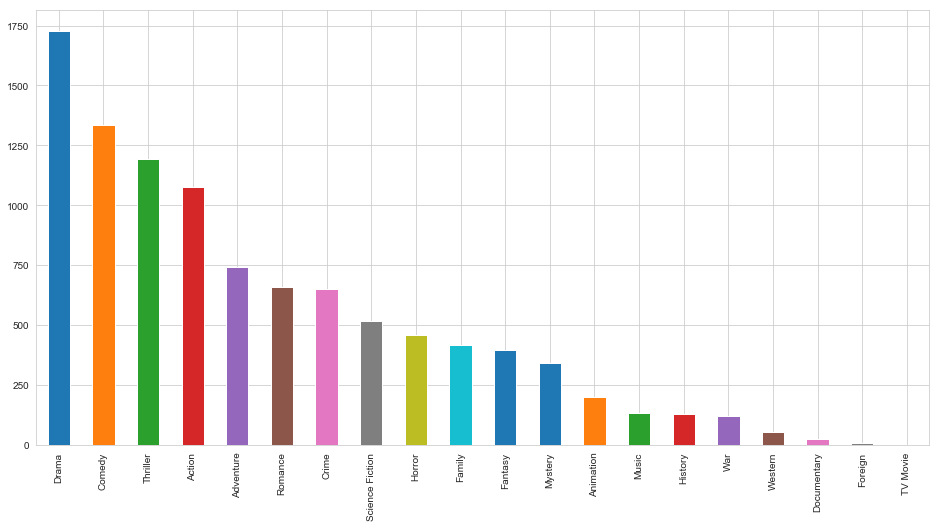

In [33]:

merged_df['genre'].value_counts().plot(kind='bar', figsize=(16, 8));

We got the chart of the different genres and their frequencies.
Now, we are checking genres with respect to the popularity over the years.
We take the genres and group by the release year while calculating the mean popularity in that group. 



In [34]:
def group_years(genre_name):
    """
    This function takes in a string that identifies the target
    column in merged_df, groups the data by release_year and 
    calculates the average popularity. It then returns a dataframe
    with two columns: release_year and the avergae popularity of the 
    input genre.
    """
    # filter for the genre value that we are targetting;
    # makes a copy df so that pandas doesn't issue a 
    # warning on the next operation
    genre = merged_df[merged_df['genre'] == genre_name].copy()
    # drop the genre column as it's now extraneous
    genre.drop(['genre'], axis=1, inplace=True)
    # group by release_year and calculate the mean
    popularity_mean = genre.groupby(['release_year']).mean().reset_index()
    # rename the popularity column to include the genre name
    popularity_mean.rename(columns={'popularity':'popularity_' + genre_name.lower()}, inplace=True)
    return popularity_mean

In [35]:
# run the function against all the genre columns
# and store against a variable
drama_popularity = group_years('Drama')
comedy_popularity = group_years('Comedy')
thriller_popularity = group_years('Thriller')
action_popularity = group_years('Action')
romance_popularity = group_years('Romance')
horror_popularity = group_years('Horror')
adventure_popularity = group_years('Adventure')
crime_popularity = group_years('Crime')
family_popularity = group_years('Family')
scifi_popularity = group_years('Science Fiction')
fantasy_popularity = group_years('Fantasy')
mystery_popularity = group_years('Mystery')
animation_popularity = group_years('Animation')
documentary_popularity = group_years('Documentary')
music_popularity = group_years('Music')
history_popularity = group_years('History')
war_popularity = group_years('War')
foreign_popularity = group_years('Foreign')
tv_popularity = group_years('TV Movie')
western_popularity = group_years('Western')

In [36]:
# Step through and merge each one in turn into a single df
genre_merge = pd.merge(drama_popularity, comedy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, thriller_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, action_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, romance_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, horror_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, adventure_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, crime_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, family_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, scifi_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, fantasy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, mystery_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, animation_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, documentary_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, music_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, history_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, war_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, foreign_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, tv_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, western_popularity, on='release_year', how='left')
# check the first result to see that we have all the expected columns
genre_merge.head(1)

,release_year,popularity_drama,runtime_x,popularity_comedy,runtime_y,popularity_thriller,runtime_x,popularity_action,runtime_y,popularity_romance,...,popularity_history,runtime_y,popularity_war,runtime_x,popularity_foreign,runtime_y,popularity_tv movie,runtime_x,popularity_western,runtime_y
0,1960,1.564871,143.666667,0.501564,108.0,2.610362,109.0,1.504538,162.5,0.501564,...,1.136943,197.0,NaN,NaN,NaN,NaN,NaN,NaN,1.872132,128.0


Since we are having 20 genres, we are dividing it with 5 groups each with 4 genres for the ease of visualization. I have taken the 20 genres in the bar graph, divided them equally into 5 before selecting the 1st from each group for my first line plot, the 2nd from each group for my second line plot, and so on.

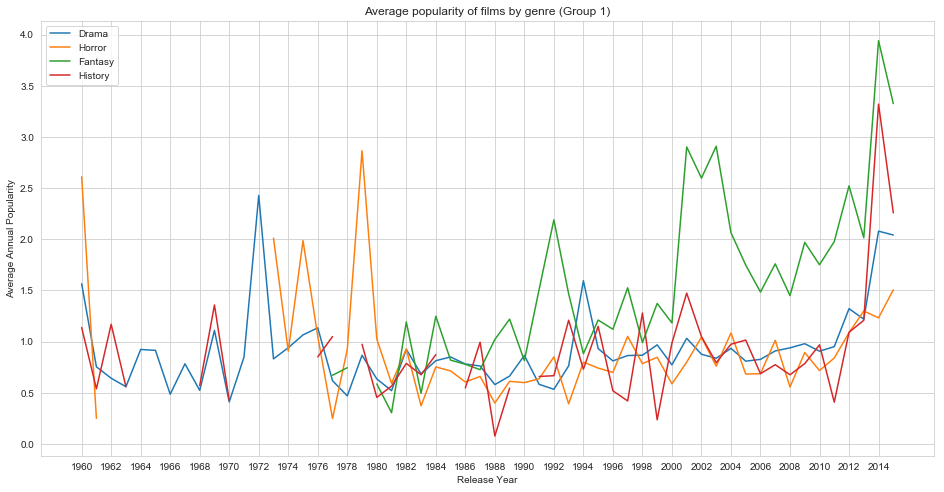

In [37]:
# group 1: drama, horror, fantasy and history
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 1)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_drama', data=genre_merge, label="Drama")
ax.plot('release_year', 'popularity_horror', data=genre_merge, label="Horror")
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_history', data=genre_merge, label="History")
ax.legend(loc='upper left');

Group 1 Visualization:From this graph, we can see that Fantasy genre is the ost popular among these four we have considered, i.e., Drama,Horror, Fantasy, History.Drama genre is gaining popularity over the recent years and horror is slowly declining.History got a huge uplift from around 2011 as per the graph.

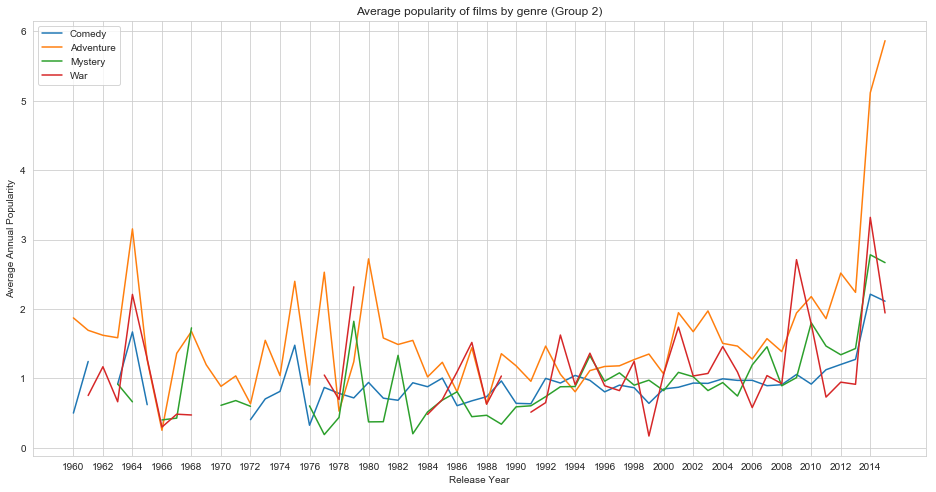

In [38]:
# group 2: comedy, adventure, mystery, war
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 2)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_comedy', data=genre_merge, label="Comedy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_war', data=genre_merge, label="War")
ax.legend(loc='upper left');

Group 2 visualization: From this graph, we can clearly see that adventure genre wins the race and it got huge uplift from around 2013, even though around 1968 Mystery got the peak..Where Comedy genre became the least popular.

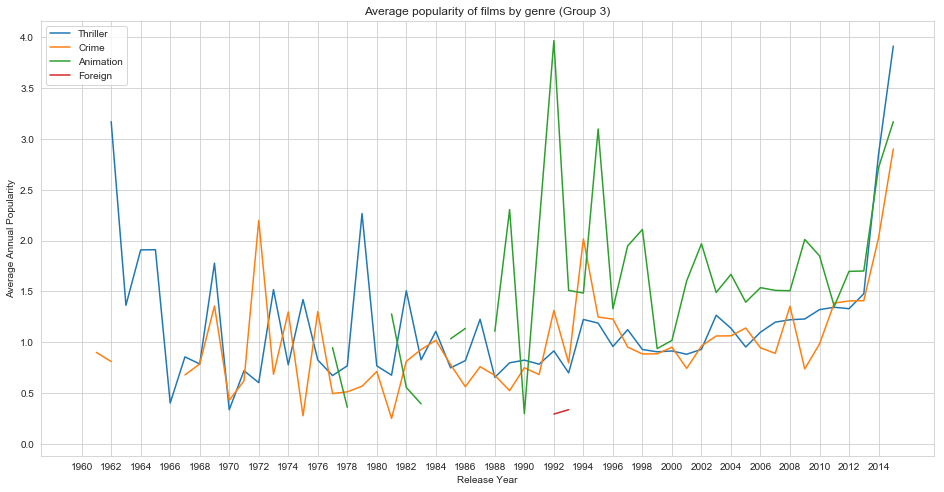

In [39]:
# group 3: thriller, crime, animation, foreign
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 3)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_thriller', data=genre_merge, label="Thriller")
ax.plot('release_year', 'popularity_crime', data=genre_merge, label="Crime")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_foreign', data=genre_merge, label="Foreign")
ax.legend(loc='upper left');

Group 3 Visualization: Here we can see huge lack of data in Foreign genre also some for animation genre as well.Overall we can see thatAnimation got the peak in 1967,1969,1989,1991,1995.Crime genre recently got the uplift and edging Thriller genre by some value.

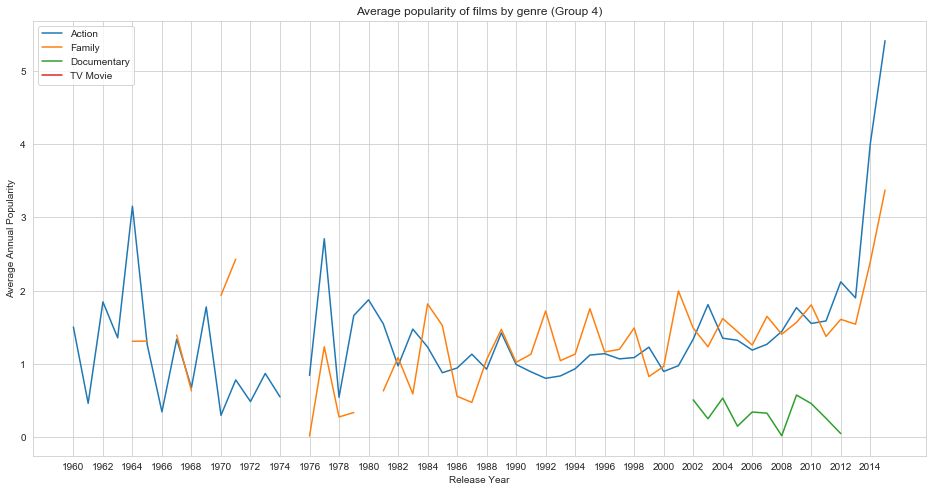

In [40]:
# group 4: action, family, documentary, tv movie
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 4)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_documentary', data=genre_merge, label="Documentary")
ax.plot('release_year', 'popularity_tv movie', data=genre_merge, label="TV Movie")
ax.legend(loc='upper left');

Group 4 Visualization:We are getting huge lack of datas for Documentary, TV Movie genre.We are getting close competition bewteen Action and Family genre.Action genre is winning the race if we consider latest year.Around 1971,Family genre got a good amount of audiences and got the peak.

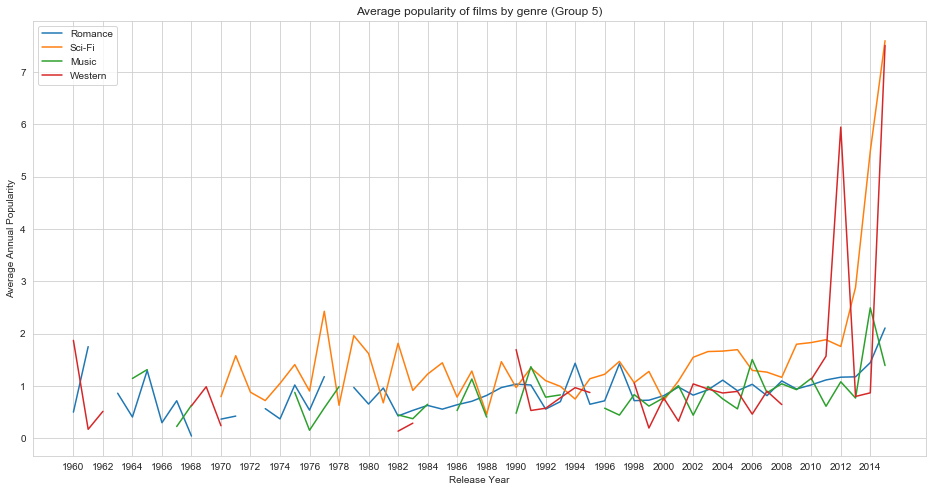

In [41]:

# group 5: romance, sci-fi, music, western
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 5)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_romance', data=genre_merge, label="Romance")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_music', data=genre_merge, label="Music")
ax.plot('release_year', 'popularity_western', data=genre_merge, label="Western")
ax.legend(loc='upper left');

Group 5 Visualization: We are getting many missing datas for Western genres and also for Music genre.Sci-Fi has been mostly popular over the year though recently Western Genre got a huge uplift from 2013.

Now we are visualising the most popular in each group and comparing these together via below graph :

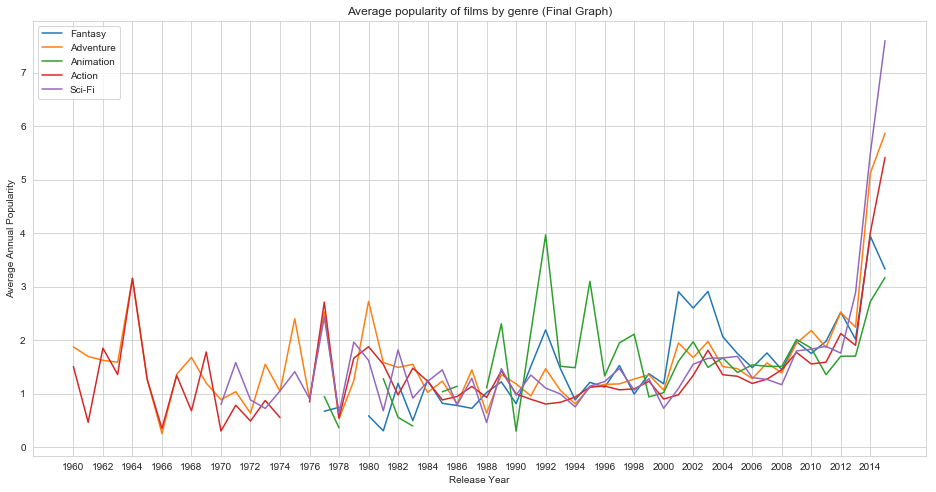

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Final Graph)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.legend(loc='upper left');

In [43]:
# compare close line graphs
genre_merge.loc[:, ['popularity_animation', 'popularity_action', 'popularity_science fiction', 'popularity_fantasy', 'popularity_adventure']].mean()

popularity_animation          1.680659
popularity_action             1.363694
popularity_science fiction    1.509863
popularity_fantasy            1.556537
popularity_adventure          1.596937
dtype: float64

Summary of the visualization: We can see from the final graph that Adventure genre is winnig the race in recent years audience pulling.Even though around 1967 and from 1987 to 1996 we got the most lovable genre as Animation,2000-2003 we found Fantasy wiing the race.


<a id='eda'></a>


### Research Question 2 (In Which Year the Most of the Movies got released?)

In the question, we are checking what are the top ten years where most numbers of movies got released.
We have found out via code below and also visualized via bar chart shown as well.


In [44]:
df['release_year'].value_counts()[0:10]

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2007    159
2005    159
Name: release_year, dtype: int64

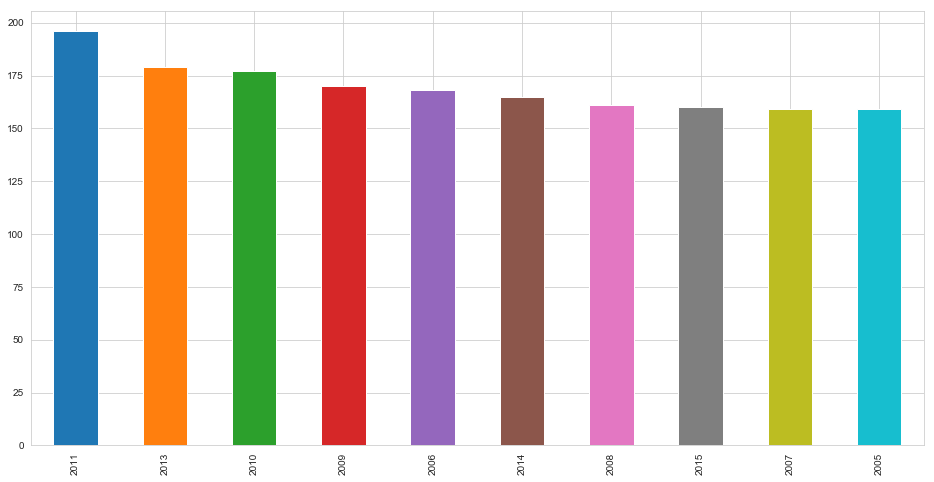

In [45]:
df['release_year'].value_counts()[0:10].plot(kind='bar', figsize=(16, 8));

From this graph,we can depict that 2011 is the year where most number of movies got released.

<a id='eda'></a>


### Research Question 3 (What are the average popularities of movies according to budget levels?)


In [46]:
# First we need to make columns for budget ranges
# We use the cut methods of the pandas library to do so
df['budget_ranges'] = pd.cut(df['budget'], df['budget'].describe()[3:8], labels = ['Low', 'Medium', 'Moderately High', 'High'])

In [47]:
# Having a look at our dataset after new column was added
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_ranges
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High


In [48]:
# Now we find out the average popularities of each level
df.groupby('budget_ranges')['popularity'].mean()

budget_ranges
Low                0.705146
Medium             0.958545
Moderately High    1.174654
High               2.080911
Name: popularity, dtype: float64

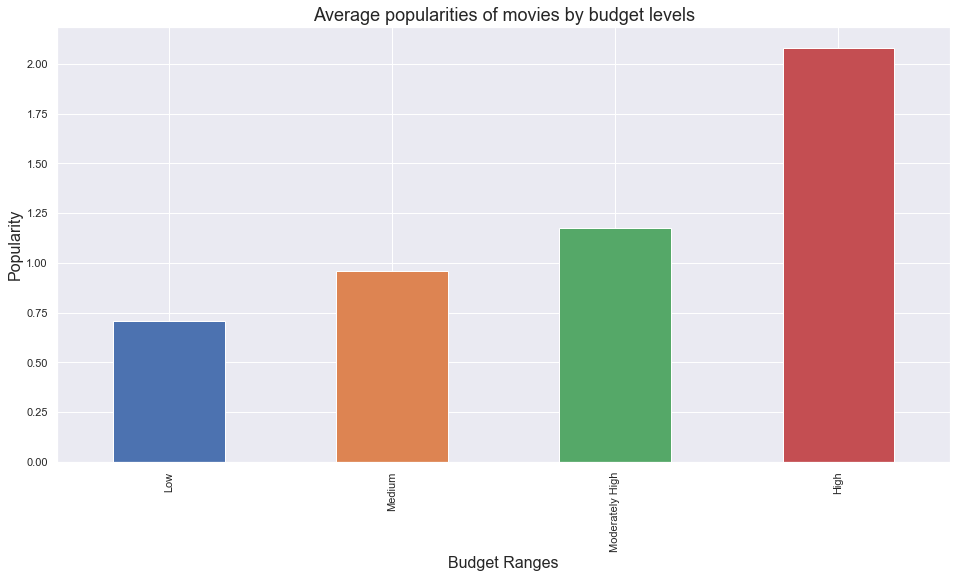

In [49]:
# Plotting the above information in a bar graph
sns.set()
df.groupby('budget_ranges')['popularity'].mean().plot(kind = 'bar', figsize = (16, 8))

# Setting the title of the plot
plt.title('Average popularities of movies by budget levels', fontsize = 18)

# Setting the x and y axis labels
plt.xlabel('Budget Ranges', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

From this Visualiation we can clearly depict that movies with a higher budget range tend to be more popular with the audience.

<a id='eda'></a>


### Research Question 4 (What are profit trends from year to year?)

In [50]:
# First we need to insert a column for the profit/loss value of each movie
df.insert(3, 'profit_loss', df['revenue'] - df['budget'])

In [51]:
# Check to see if column was inserted
df.head(1)

,id,popularity,budget,profit_loss,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_ranges
0,135397,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,High


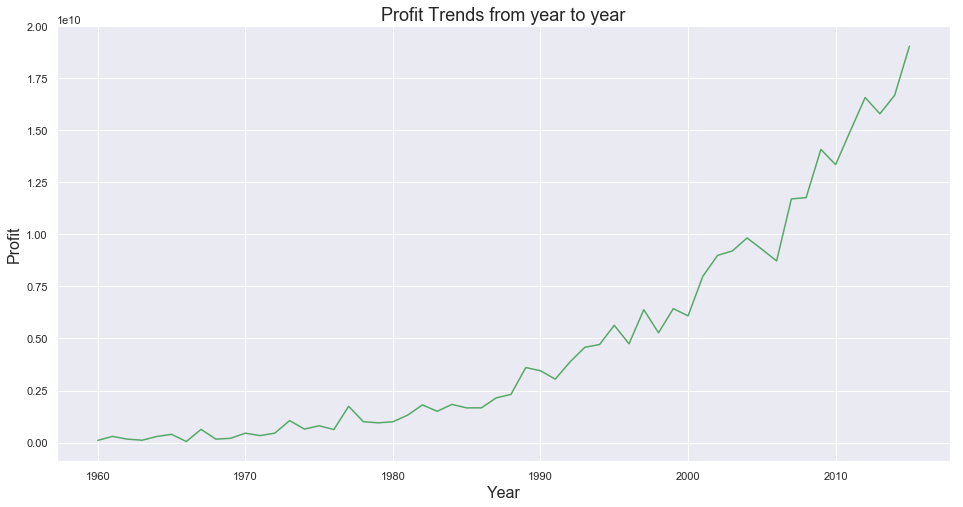

In [52]:
df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

From this graph, we can visualize that Profits have increased exponentially with each passing year especially after the beginning of the 21st century.

<a id='eda'></a>


### Research Question 5 (What are the average runtimes of movies over the years?)

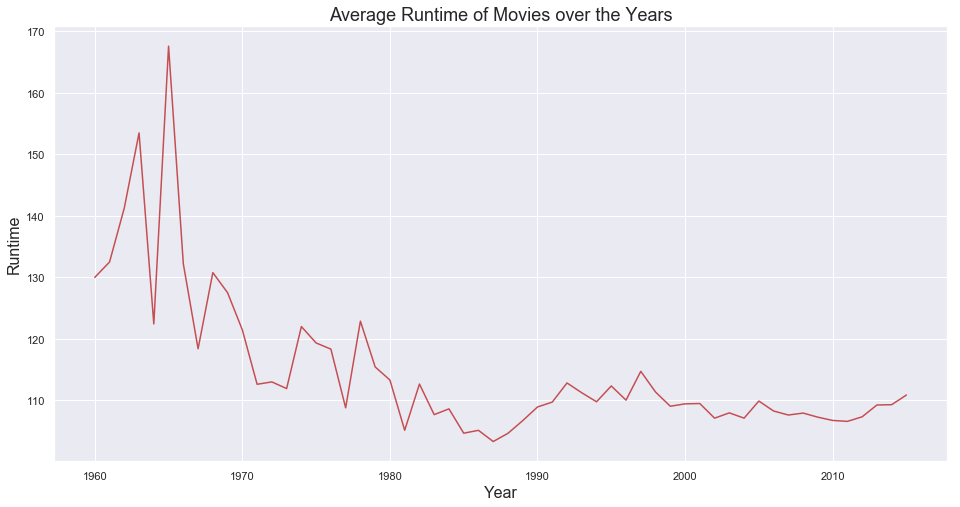

In [53]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

From this visualization, we can conclude that,the runtime of movies has decreased with each passsing year. It experienced a hike during the 60s but has then steadily decreased over the years. The lowest was around 100-110 mintues. Presently, movies tend to last around the 110 minute mark.
So we can depict that directors and producers are preferring shorter movies over times and also acceptable to the audience.

<a id='eda'></a>


### Research Question 6 (Which are the 5 cheapest and most expensive profitable movies of all time?)

For this we shall set a standard value of profit which has to be met, that value will be $50,000,000

In [54]:
# creating a list of columns that will be viewed
col = ['original_title', 'cast', 'director', 'budget', 'revenue', 'profit_loss']

# Using query function to show records of movies which have a profit of more than $50,000,000
# Also using sort_values function to make sure it is sorted according to the budget column

df.query('profit_loss>50000000')[col].sort_values('budget', ascending = False).head(5)

,original_title,cast,director,budget,revenue,profit_loss
3375,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,380000000.0,1.021683e+09,6.416830e+08
7387,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,300000000.0,9.610000e+08,6.610000e+08
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,280000000.0,1.405036e+09,1.125036e+09
6570,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,270000000.0,3.910812e+08,1.210812e+08
1929,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,260000000.0,5.917949e+08,3.317949e+08


In [55]:
df.query('profit_loss>50000000')[col].sort_values('budget', ascending = True).head(5)

,original_title,cast,director,budget,revenue,profit_loss
10495,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,115103979.0,115103866.0
7447,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,15000.0,193355800.0,193340800.0
2449,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,25000.0,248000000.0,247975000.0
7057,Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,130000.0,54667954.0,54537954.0
10759,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,300000.0,70000000.0,69700000.0


<a id='eda'></a>


### Research Question 7 (Which variables affect the revenue and popularity of a film?)

In [56]:
# Use corr to compute correlation of columns
df.corr()

,id,popularity,budget,profit_loss,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.188179,-0.029224,0.002896,-0.004503,-0.036166,0.110555,-0.000700,0.491245
popularity,0.188179,1.000000,0.443626,0.594868,0.613793,0.213690,0.779125,0.319927,0.175991
budget,-0.029224,0.443626,1.000000,0.525128,0.687059,0.259562,0.554689,0.022945,0.271915
profit_loss,0.002896,0.594868,0.525128,1.000000,0.979149,0.219278,0.727533,0.260687,0.089493
revenue,-0.004503,0.613793,0.687059,0.979149,1.000000,0.249178,0.753574,0.228051,0.141317
runtime,-0.036166,0.213690,0.259562,0.219278,0.249178,1.000000,0.273464,0.359173,-0.113488
vote_count,0.110555,0.779125,0.554689,0.727533,0.753574,0.273464,1.000000,0.389853,0.209688
vote_average,-0.000700,0.319927,0.022945,0.260687,0.228051,0.359173,0.389853,1.000000,-0.135646
release_year,0.491245,0.175991,0.271915,0.089493,0.141317,-0.113488,0.209688,-0.135646,1.000000


From this data, we can see that revenue is strongly correlated with popularity, budget, vote_count hence it is affected positively with the growth and fall of these parameters' values.On the other hand it is showing weak correlation with runtime hence revenue doesn't really depend much on how lenghty the movie is.

<p>For the case of popularity, we can see it is strongly correlated with revenue, profit_loss and vote_count where as it is having moderate correlation with budget.</p>

<a id='conclusions'></a>
## Conclusion:
From the above analysis, the following can be concluded as the criterias that need to be met in order to create a successful movie.
* Comedy, Drama, Action, Thriller or Adventure- these are the most popular genres and likely to be audience pulling.
* Producers need to invest more amount of money in order the get the most profit since higher budget range tend to be more popular with the audience.
* Filmmaker needs to concentrate the runtime of the movies, it should be around 110 minutes, too sohrt or too lengthy movies tend to be less crowd pulling as per the trend.
* We can also conclude that revenue is strongly depending upon popularity,profit.

<a id='conclusions'></a>
## Limitations:
* The above conclusion is not a 100% formula to success as it only takes into considerations movies that have made a sizeable profit (50 million USD). Some movies may not have such a huge target as they canot get huge incestments so they settle for a much lower profit. There are a lot of cult movies too which may have earned revenue after it released in digital but not when they were out in theatres.
* The overall data is not clean, we had to cut and drop so many of datas which made the dataset smaller and also from the graph analysis of the genre, we can see so many issing values for some genres which made the visualization not totally accurate.
* Also, the budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates. Different countries may also have different rules and regulations they have to follow which may restrict them from artistiic freedom.
* There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects.